In [ ]:
#import libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import statistics


#COVID-19 Simulator Predictions for PA
url = 'https://raw.githubusercontent.com/IvanVoinovGitHub/Covid19-Analysis-Modeling/main/Data/dataFile_new_diag_cases_State-level.csv'
df1 = pd.read_csv(url)

#Actual Daily Cases for PA
url2 = 'https://raw.githubusercontent.com/IvanVoinovGitHub/Covid19-Analysis-Modeling/main/Data/COVID-19_Aggregate_Cases_Current_Daily_County_Health.csv'
df2 = pd.read_csv(url2)

In [ ]:
#check types of data frames
type(df1)
type(df2)

pandas.core.frame.DataFrame

In [ ]:
#convert date to datetime object
df1['dates'] = pd.to_datetime(df1['dates'])
df2['Date'] = pd.to_datetime(df2['Date'])

In [ ]:
#sort datasets by date
df1.sort_values(by='dates')
df2.sort_values(by='Date')

,Jurisdiction,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
14260,Schuylkill,2020-03-01,0,NaN,0,141359,0.0,NaN,0.0,42107,-76.223324,40.707512,POINT (-76.22332385 40.70751243)
21106,Lancaster,2020-03-01,0,NaN,0,545724,0.0,NaN,0.0,42071,-76.251388,40.045908,POINT (-76.25138768 40.04590796)
20702,Clearfield,2020-03-01,0,NaN,0,79255,0.0,NaN,0.0,42033,-78.475583,41.000429,POINT (-78.47558343 41.000429)
20673,Luzerne,2020-03-01,0,NaN,0,317417,0.0,NaN,0.0,42079,-75.991996,41.178364,POINT (-75.9919961 41.17836439)
25848,Sullivan,2020-03-01,0,NaN,0,6066,0.0,NaN,0.0,42113,-76.514792,41.448099,POINT (-76.5147922 41.4480994)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12514,Potter,2022-03-02,3,3.4,3127,16526,18.2,20.7,18921.7,42105,-77.898792,41.744206,POINT (-77.89879229 41.74420644)
12260,Cumberland,2022-03-02,22,30.7,50516,253370,8.7,12.1,19937.6,42041,-77.268663,40.167598,POINT (-77.26866271 40.16759839)
10666,Lehigh,2022-03-02,20,20.9,88836,369318,5.4,5.6,24054.1,42077,-75.600995,40.614648,POINT (-75.60099481 40.61464794)
10743,Venango,2022-03-02,7,3.6,11175,50668,13.8,7.0,22055.3,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259)


In [ ]:
df1.rename(columns = {'dates':'Date'}, inplace = True)
df2.rename(columns = {'dates':'Date'}, inplace = True)

In [ ]:
print(df1)

     Unnamed: 0       Date  reportedValues  estimatedValues  \
0             1 2020-03-15             4.0                4   
1             2 2020-03-16             5.0                5   
2             3 2020-03-17             7.0                7   
3             4 2020-03-18             9.0                9   
4             5 2020-03-19            13.0               13   
..          ...        ...             ...              ...   
830         831 2022-06-23             NaN                9   
831         832 2022-06-24             NaN                9   
832         833 2022-06-25             NaN                8   
833         834 2022-06-26             NaN                8   
834         835 2022-06-27             NaN                8   

     estimatedValues_lowerBound  estimatedValues_upperBound  
0                           NaN                         NaN  
1                           NaN                         NaN  
2                           NaN                         N

In [ ]:
#need to group the Actual Daily Cases for PA by date
df2_groupedbydate = df2.groupby(["Date"]).sum()
print(df2_groupedbydate)

            New Cases  7-day Average New Cases  \
Date                                             
2020-03-01          0                      0.0   
2020-03-02          0                      0.0   
2020-03-03          0                      0.0   
2020-03-04          0                      0.0   
2020-03-05          0                      0.0   
...               ...                      ...   
2022-02-26       1598                   3219.4   
2022-02-27       1240                   3128.6   
2022-02-28       2664                   3062.1   
2022-03-01       2430                   2838.8   
2022-03-02       2180                   2594.1   

            Cumulative cases                            Population (2019)  \
Date                                                                        
2020-03-01                                           0           25603978   
2020-03-02                                           0           25603978   
2020-03-03                               

In [ ]:
#Merge Datasets on Data attribute
merged_inner = pd.merge(left=df2_groupedbydate, right=df1, left_on='Date', right_on='Date')
merged_inner

,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Unnamed: 0,reportedValues,estimatedValues,estimatedValues_lowerBound,estimatedValues_upperBound
0,2020-03-15,30,20.2,158,25603978,3.8,2.6,20.5,2860489,-5275.682283,2774.207671,1,4.0,4,NaN,NaN
1,2020-03-16,60,27.7,218,25603978,6.2,3.3,26.6,2860489,-5275.682283,2774.207671,2,5.0,5,NaN,NaN
2,2020-03-17,76,37.1,294,25603978,4.9,3.8,31.6,2860489,-5275.682283,2774.207671,3,7.0,7,NaN,NaN
3,2020-03-18,136,54.1,430,25603978,14.5,5.7,45.9,2860489,-5275.682283,2774.207671,4,9.0,9,NaN,NaN
4,2020-03-19,212,82.0,642,25603978,28.3,9.7,74.2,2860489,-5275.682283,2774.207671,5,13.0,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,2022-02-26,1598,3219.4,5512720,25603978,492.8,1056.9,1516721.7,2860489,-5275.682283,2774.207671,714,2370.0,2370,NaN,NaN
714,2022-02-27,1240,3128.6,5513960,25603978,405.1,1032.4,1517126.9,2860489,-5275.682283,2774.207671,715,2230.0,2230,2140.0,3470.0
715,2022-02-28,2664,3062.1,5516624,25603978,865.4,1001.6,1517991.9,2860489,-5275.682283,2774.207671,716,NaN,2090,1970.0,3370.0
716,2022-03-01,2430,2838.8,5519054,25603978,829.5,909.8,1518821.2,2860489,-5275.682283,2774.207671,717,NaN,1940,1810.0,3270.0


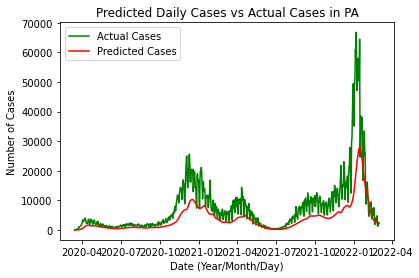

In [ ]:
#Create plot of Actual vs. Predicted Cases

#Actual Cases Line
plt.plot(merged_inner['Date'], merged_inner['New Cases'], color='g', label='Actual Cases')

#Predicted Cases Line
plt.plot(merged_inner['Date'], merged_inner['reportedValues'], color='r', label='Predicted Cases')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Number of Cases') 
plt.title("Predicted Daily Cases vs Actual Cases in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
type(merged_inner)

pandas.core.frame.DataFrame

In [ ]:
merged_inner['New Cases'][13]
merged_inner['reportedValues'][7]

32.0

In [ ]:
#error calculations
#confirmed = merged_inner['New Cases']
#projected = merged_inner["reportedValues"]
error = []
rawerror = []

for index, row in merged_inner.iterrows():
  rawerror.append(-1*(row['New Cases'] - row["reportedValues"]) / row['New Cases'])
  error.append((abs(row['New Cases'] - row["reportedValues"])) / row['New Cases'])

underpredictCount = 0
overpredictCount = 0
for x in rawerror:
  if x < 0:
    underpredictCount += 1
  elif x > 0:
    overpredictCount += 1

underpredictPerecentage = underpredictCount / len(rawerror)
overpredictPercentage = 1 - underpredictPerecentage

print(underpredictCount)
print(underpredictPerecentage)
print(overpredictCount)
print(overpredictPercentage)
print(len(error))

print(error)
print(rawerror)

682
0.9498607242339833
33
0.05013927576601673
718
[0.8666666666666667, 0.9166666666666666, 0.9078947368421053, 0.9338235294117647, 0.9386792452830188, 0.9267241379310345, 0.8928571428571429, 0.8918918918918919, 0.9156862745098039, 0.8875968992248062, 0.9280442804428044, 0.9014732965009208, 0.8718637992831542, 0.8552425665101722, 0.8330975954738331, 0.8088426527958388, 0.817766497461929, 0.8093556928508385, 0.8189285714285715, 0.8270918665886483, 0.7556577086280056, 0.733822548365577, 0.7028086218158066, 0.714047751249306, 0.7183794466403162, 0.6552660152008686, 0.6020761245674741, 0.37341236240474174, 0.3973561430793157, 0.27732610659439927, 0.34092758340113916, 0.32046979865771813, 0.566410537870472, 0.5759911894273128, 0.4119968429360695, 0.18994413407821228, 0.4332797427652733, 0.48622486969471335, 0.6332254584681769, 0.5792682926829268, 0.5501618122977346, 0.47507552870090636, 0.23710208562019758, 0.5345744680851063, 0.39471440750213127, 0.5477545857052498, 0.583579444772593, 0.477

In [ ]:
#accuracy calculations
accuracy = []

for i in error:
  accuracy.append(1 - i)

print(accuracy)

[0.1333333333333333, 0.08333333333333337, 0.09210526315789469, 0.06617647058823528, 0.061320754716981174, 0.07327586206896552, 0.1071428571428571, 0.10810810810810811, 0.08431372549019611, 0.11240310077519378, 0.0719557195571956, 0.09852670349907922, 0.12813620071684584, 0.14475743348982784, 0.1669024045261669, 0.19115734720416122, 0.18223350253807102, 0.19064430714916147, 0.18107142857142855, 0.1729081334113517, 0.24434229137199437, 0.26617745163442297, 0.2971913781841934, 0.285952248750694, 0.28162055335968383, 0.3447339847991314, 0.39792387543252594, 0.6265876375952583, 0.6026438569206842, 0.7226738934056007, 0.6590724165988608, 0.6795302013422819, 0.433589462129528, 0.42400881057268724, 0.5880031570639306, 0.8100558659217877, 0.5667202572347267, 0.5137751303052867, 0.3667745415318231, 0.4207317073170732, 0.44983818770226536, 0.5249244712990937, 0.7628979143798025, 0.46542553191489366, 0.6052855924978687, 0.4522454142947502, 0.41642055522740695, 0.5226093402520385, 0.667302192564347

In [ ]:
#Create Error and Accuracy Column and insert list data
merged_inner['Error'] = error
merged_inner['Accuracy'] = accuracy
merged_inner['RawError'] = rawerror

print(merged_inner)

          Date  New Cases  7-day Average New Cases  \
0   2020-03-15         30                     20.2   
1   2020-03-16         60                     27.7   
2   2020-03-17         76                     37.1   
3   2020-03-18        136                     54.1   
4   2020-03-19        212                     82.0   
..         ...        ...                      ...   
713 2022-02-26       1598                   3219.4   
714 2022-02-27       1240                   3128.6   
715 2022-02-28       2664                   3062.1   
716 2022-03-01       2430                   2838.8   
717 2022-03-02       2180                   2594.1   

     Cumulative cases                            Population (2019)  \
0                                           158           25603978   
1                                           218           25603978   
2                                           294           25603978   
3                                           430           25603978   
4

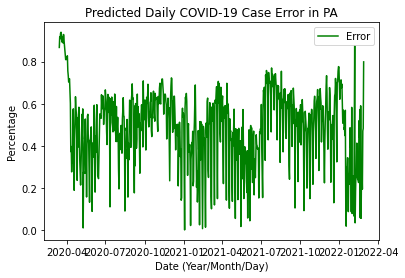

In [ ]:
from IPython.core.pylabtools import figsize
#Create plot of Error

#Error Line
plt.plot(merged_inner['Date'], merged_inner['Error'], color='g', label='Error')


#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Error in PA")
#Display Plot
plt.legend()
plt.show()

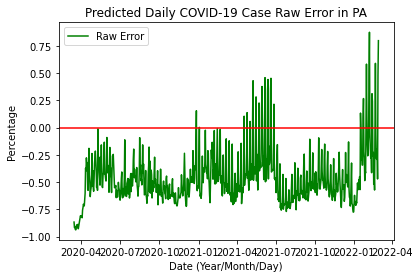

In [ ]:
#Create plot of Raw Error

#Raw Error Line
plt.plot(merged_inner['Date'], merged_inner['RawError'], color='g', label='Raw Error')
plt.axhline(y=0.0, color='r', linestyle='-')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Raw Error in PA")
#Display Plot
plt.legend()
plt.show()

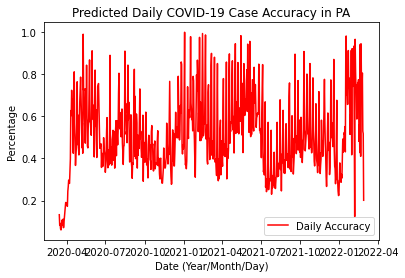

In [ ]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(merged_inner['Date'], merged_inner['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Calculate Weekly Accuracy Averages
weeklyAccuracy = 0
averageWeeklyAccuracy = []
length = len(accuracy)
amountOfWeeks = int(length / 7)
remainderDays = length % 7

i = 0
while i < length:
  weeklyAccuracy += accuracy[i]
  if (i + 1) % 7 == 0 and amountOfWeeks > 0:
    averageWeeklyAccuracy.append(weeklyAccuracy / 7)
    amountOfWeeks -= 1
    weeklyAccuracy = 0
  if (i + 1) % remainderDays == 0 and remainderDays > 0 and amountOfWeeks == 0:
    averageWeeklyAccuracy.append(weeklyAccuracy / remainderDays)
    weeklyAccuracy = 0
  i += 1

weeklyDateList = []
i = 0
weeklyDateList.append(merged_inner['Date'][i])
while i < length:
  if (i + 1) % 7 == 0:
    weeklyDateList.append(merged_inner['Date'][i])
  i += 1

In [ ]:
#Create Dataframe for Weekly Accuracy
i = 0
data = []
while i < len(averageWeeklyAccuracy):
  data.append([weeklyDateList[i], averageWeeklyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Week Of', 'Average Weekly Accuracy'])

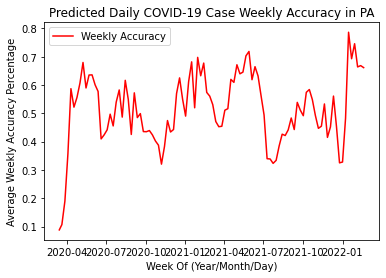

In [ ]:
#Create plot of Weekly Accuracy

#Accuracy Line
plt.plot(df['Week Of'], df['Average Weekly Accuracy'], color='r', label='Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Week Of (Year/Month/Day)') 
plt.ylabel('Average Weekly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Weekly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Create Running Weekly Average
runningweeklyAccuracy = 0
runningAverageWeeklyAccuracy = []
length = len(accuracy)

i = 1
j = 8
#Add first week average
runningAverageWeeklyAccuracy.append(averageWeeklyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningweeklyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAverageWeeklyAccuracy.append(runningweeklyAccuracy / 7)
  runningweeklyAccuracy = 0

  i += 1
  j += 1

In [ ]:
#Create Dataframe for Running Weekly Accuracy
i = 0
data = []
while i < len(runningAverageWeeklyAccuracy):
  data.append([merged_inner['Date'][i], runningAverageWeeklyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Weekly Average Accuracy'])

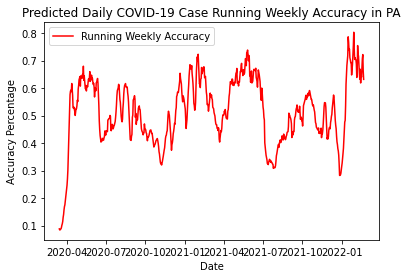

In [ ]:
#Create plot of Running Weekly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Weekly Average Accuracy'], color='r', label='Running Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Weekly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

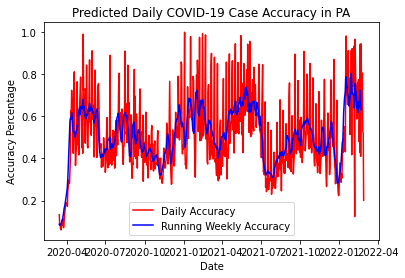

In [ ]:
#Plot with combined daily accuracy and running weekly accuracy

#Daily Accuracy
plt.plot(merged_inner['Date'], merged_inner['Accuracy'], color='r', label='Daily Accuracy')

#Running Accuracy Line
plt.plot(df['Date'], df['Running Weekly Average Accuracy'], color='b', label='Running Weekly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Calculate Monthly Accuracy Averages
#We are going to use an average of 30 days per month for these calculations

monthlyAccuracy = 0
averageMonthlyAccuracy = []
amountOfMonths = int(length / 30)
remainderDays = length % 30

i = 0
while i < length:
  monthlyAccuracy += accuracy[i]
  if (i + 1) % 30 == 0 and amountOfMonths > 0:
    averageMonthlyAccuracy.append(monthlyAccuracy / 30)
    amountOfMonths -= 1
    monthlyAccuracy = 0
  if (i + 1) % remainderDays == 0 and remainderDays > 0 and amountOfMonths == 0:
    averageMonthlyAccuracy.append(monthlyAccuracy / remainderDays)
    monthlyAccuracy = 0
  i += 1

weeklyDateListForMonths = []
i = 0
weeklyDateListForMonths.append(merged_inner['Date'][i])
while i < length:
  if (i + 1) % 30 == 0:
    weeklyDateListForMonths.append(merged_inner['Date'][i])
  i += 1


In [ ]:
#Create Dataframe for Monthly Accuracy
i = 0
data = []
while i < len(averageMonthlyAccuracy):
  data.append([weeklyDateListForMonths[i], averageMonthlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Month Of', 'Average Monthly Accuracy'])

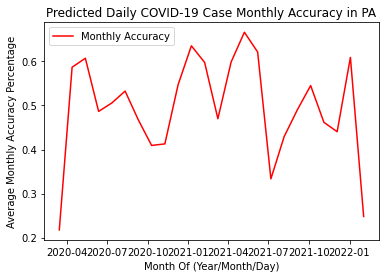

In [ ]:
#Create plot of Monthly Accuracy

#Accuracy Line
plt.plot(df['Month Of'], df['Average Monthly Accuracy'], color='r', label='Monthly Accuracy')

#Create XY Labels and Title
plt.xlabel('Month Of (Year/Month/Day)') 
plt.ylabel('Average Monthly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Monthly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Calculate Running Monthly Accuracy

runningmonthlyAccuracy = 0
runningAveragemonthlyAccuracy = []
length = len(accuracy)

i = 1
j = 31
#Add first week average
runningAveragemonthlyAccuracy.append(averageMonthlyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningmonthlyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAveragemonthlyAccuracy.append(runningmonthlyAccuracy / 30)
  runningmonthlyAccuracy = 0

  i += 1
  j += 1

In [ ]:
#Create Dataframe for Running Monthly Accuracy
i = 0
data = []
while i < len(runningAveragemonthlyAccuracy):
  data.append([merged_inner['Date'][i], runningAveragemonthlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Monthly Average Accuracy'])

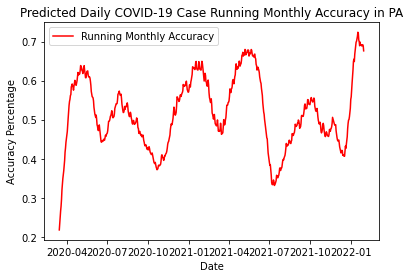

In [ ]:
#Create plot of Running Monthly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Monthly Average Accuracy'], color='r', label='Running Monthly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Monthly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Calculate Yearly Accuracy Averages
#We are going to use an average of 365 days per year for these calculations

yearlyAccuracy = 0
averageYearlyAccuracy = []
amountOfYears = int(length / 365)
remainderDays = length % 365

i = 0
while i < length:
  yearlyAccuracy += accuracy[i]
  if (i + 1) % 365 == 0 and amountOfYears > 0:
    averageYearlyAccuracy.append(yearlyAccuracy / 365)
    amountOfYears -= 1
    yearlyAccuracy = 0
  if (i + 1) % remainderDays == 0 and remainderDays > 0 and amountOfYears == 0:
    averageYearlyAccuracy.append(yearlyAccuracy / remainderDays)
    yearlyAccuracy = 0
  i += 1

weeklyDateListForYears = []
i = 0
weeklyDateListForYears.append(merged_inner['Date'][i])
while i < length:
  if (i + 1) % 365 == 0:
    weeklyDateListForYears.append(merged_inner['Date'][i])
  i += 1

In [ ]:
print(averageYearlyAccuracy)

[0.5013518745610667, 0.5038924810775386]


In [ ]:
#Create Dataframe for Yearly Accuracy
i = 0
data = []
while i < len(averageYearlyAccuracy):
  data.append([weeklyDateListForYears[i], averageYearlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Year Of', 'Average Yearly Accuracy'])

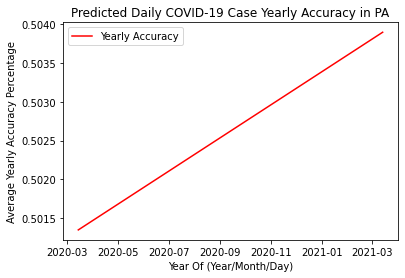

In [ ]:
#Create plot of Yearly Accuracy

#Accuracy Line
plt.plot(df['Year Of'], df['Average Yearly Accuracy'], color='r', label='Yearly Accuracy')

#Create XY Labels and Title
plt.xlabel('Year Of (Year/Month/Day)') 
plt.ylabel('Average Yearly Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Yearly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Calculate Running Yearly Accuracy

runningyearlyAccuracy = 0
runningAverageyearlyAccuracy = []
length = len(accuracy)

i = 1
j = 366
#Add first week average
runningAverageyearlyAccuracy.append(averageYearlyAccuracy[0])

while j < length:
  temp_i = i
  temp_j = j
  while temp_i < temp_j:
    runningyearlyAccuracy += accuracy[temp_i]
    temp_i += 1
  runningAverageyearlyAccuracy.append(runningyearlyAccuracy / 365)
  runningyearlyAccuracy = 0

  i += 1
  j += 1

In [ ]:
#Create Dataframe for Running Yearly Accuracy
i = 0
data = []
while i < len(runningAverageyearlyAccuracy):
  data.append([merged_inner['Date'][i], runningAverageyearlyAccuracy[i]])
  i += 1

df = pd.DataFrame(data, columns = ['Date', 'Running Yearly Average Accuracy'])

In [ ]:
#Create plot of Running Yearly Accuracy

#Accuracy Line
plt.plot(df['Date'], df['Running Yearly Average Accuracy'], color='r', label='Running Yearly Accuracy')

#Create XY Labels and Title
plt.xlabel('Date') 
plt.ylabel('Accuracy Percentage') 
plt.title("Predicted Daily COVID-19 Case Running Yearly Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

In [ ]:
#Calculate Overall Accuracy
overallAccuracy = merged_inner['Accuracy'].mean()
print(overallAccuracy)

0.5127828032177943


In [ ]:
#Create new dataframe for year 2022
data_2022 = merged_inner[(merged_inner['Date'] > '2022-01-01')]

In [ ]:
#create error and accuracy lists for 2022
error_2022=[]
for index, row in data_2022.iterrows():
  error_2022.append((abs(row['New Cases'] - row["reportedValues"])) / row['New Cases'])

accuracy_2022 = []
for i in error_2022:
  accuracy_2022.append(1 - i)

In [ ]:
#check head of 2022 data
data_2022.head(5)

,Date,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Unnamed: 0,reportedValues,estimatedValues,estimatedValues_lowerBound,estimatedValues_upperBound,Error,Accuracy,RawError
658,2022-01-02,35128,38695.9,4203914,25603978,6449.2,7426.4,1172327.7,2860489,-5275.682283,2774.207671,659,13300.0,13300,NaN,NaN,0.621385,0.378615,-0.621385
659,2022-01-03,48768,41456.9,4252682,25603978,9816.9,8055.2,1182144.5,2860489,-5275.682283,2774.207671,660,14600.0,14600,NaN,NaN,0.700623,0.299377,-0.700623
660,2022-01-04,51898,44396.0,4304580,25603978,10744.4,8691.2,1192888.2,2860489,-5275.682283,2774.207671,661,16000.0,16000,NaN,NaN,0.691703,0.308297,-0.691703
661,2022-01-05,61004,47411.2,4365584,25603978,11662.5,9215.5,1204551.4,2860489,-5275.682283,2774.207671,662,17500.0,17500,NaN,NaN,0.713134,0.286866,-0.713134
662,2022-01-06,58492,49136.1,4424076,25603978,12854.6,9728.8,1217406.1,2860489,-5275.682283,2774.207671,663,19000.0,19000,NaN,NaN,0.675169,0.324831,-0.675169


([<matplotlib.axis.XTick at 0x7ff152c06290>,
 <a list of 9 Text major ticklabel objects>)

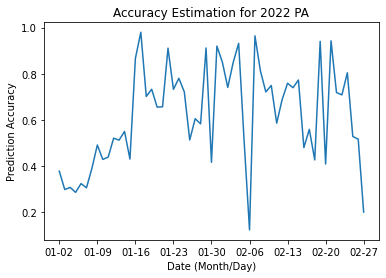

In [ ]:
#create plot for 2022 accuracy
plt.xlabel('Date (Month/Day)') 
plt.ylabel('Prediction Accuracy') 
plt.title("Accuracy Estimation for 2022 PA")

plt.plot(data_2022['Date'].dt.strftime('%m-%d'), accuracy_2022, label='Accuracy 2022')
plt.xticks(np.arange(0, len(data_2022['Date']), 7))

In [ ]:
#cleans accuracy list of all nan values
newlist = [x for x in accuracy if math.isnan(x) == False]
print(newlist)

[0.1333333333333333, 0.08333333333333337, 0.09210526315789469, 0.06617647058823528, 0.061320754716981174, 0.07327586206896552, 0.1071428571428571, 0.10810810810810811, 0.08431372549019611, 0.11240310077519378, 0.0719557195571956, 0.09852670349907922, 0.12813620071684584, 0.14475743348982784, 0.1669024045261669, 0.19115734720416122, 0.18223350253807102, 0.19064430714916147, 0.18107142857142855, 0.1729081334113517, 0.24434229137199437, 0.26617745163442297, 0.2971913781841934, 0.285952248750694, 0.28162055335968383, 0.3447339847991314, 0.39792387543252594, 0.6265876375952583, 0.6026438569206842, 0.7226738934056007, 0.6590724165988608, 0.6795302013422819, 0.433589462129528, 0.42400881057268724, 0.5880031570639306, 0.8100558659217877, 0.5667202572347267, 0.5137751303052867, 0.3667745415318231, 0.4207317073170732, 0.44983818770226536, 0.5249244712990937, 0.7628979143798025, 0.46542553191489366, 0.6052855924978687, 0.4522454142947502, 0.41642055522740695, 0.5226093402520385, 0.667302192564347

In [ ]:
#calculate variance and st deviation of accuracy
var = sum((l-overallAccuracy)**2 for l in newlist) / len(newlist)
st_dev = math.sqrt(var)
print(var)
print(st_dev)

0.031693439155000204
0.17802651250586302


In [ ]:
#calculate median of accuracy
accMedian = statistics.median(newlist)
print(accMedian)

0.49208534067446663


In [ ]:
#Seperate Running Weekly Average plot into 3 plots for the 3 variants: Original, Delta, Omicron

# Start Date - May 20th 2021
# Delta: May 20th 2021 - December 1st 2021
# Omicron: December 1st 2021 - Present


In [ ]:
type(merged_inner['Date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#print(merged_inner[:627])

In [ ]:
#print(merged_inner)
standardVariantDF = merged_inner[:432]
deltaVariantDF = merged_inner[432:627]
omicronVariantDF = merged_inner[627:]

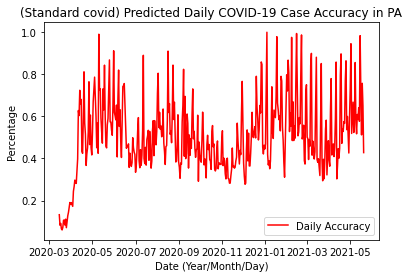

In [ ]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(standardVariantDF['Date'], standardVariantDF['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("(Standard covid) Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

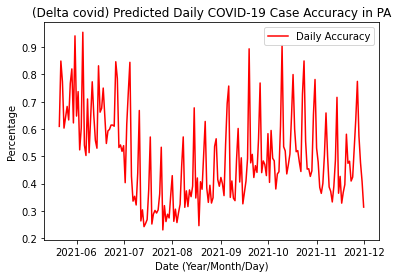

In [ ]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(deltaVariantDF['Date'], deltaVariantDF['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("(Delta covid) Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()

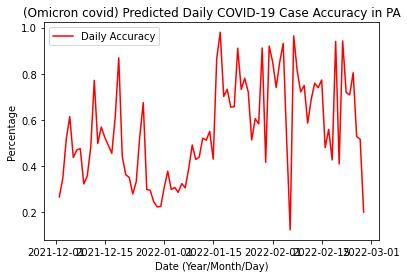

In [ ]:
#Create plot of Accuracy

#Accuracy Line
plt.plot(omicronVariantDF['Date'], omicronVariantDF['Accuracy'], color='r', label='Daily Accuracy')

#Create XY Labels and Title
plt.xlabel('Date (Year/Month/Day)') 
plt.ylabel('Percentage') 
plt.title("(Omicron covid) Predicted Daily COVID-19 Case Accuracy in PA")

#Display Plot
plt.legend()
plt.show()